In [782]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Завантажую дані

In [783]:
bronx = pd.read_excel("./Laba2Data/rollingsales_bronx.xlsx", skiprows=4)
brooklyn = pd.read_excel("./Laba2Data/rollingsales_brooklyn.xlsx", skiprows=4)
manhattan = pd.read_excel("./Laba2Data/rollingsales_manhattan.xlsx", skiprows=4)
queens = pd.read_excel("./Laba2Data/rollingsales_queens.xlsx", skiprows=4)
statenisland = pd.read_excel("./Laba2Data/rollingsales_statenisland.xlsx", skiprows=4)




Об'єдную всі дані в один дата фрейм для того щоб дізнатися які стовбці необхідно буде видалити. Наприклад, якщо в стовбці немає жодного значення, або більше 25-30% пустих значень

In [784]:
# brooklyn.drop('EASEMENT', axis=1).info()
data = pd.concat([bronx, brooklyn, manhattan, queens, statenisland])

In [785]:
data.describe()

,BOROUGH,BLOCK,LOT,EASEMENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,73305.000000,73305.000000,73305.000000,0.0,73300.000000,55472.000000,42268.000000,57801.000000,3.993900e+04,3.993900e+04,68430.000000,73305.000000,7.330500e+04,73305
mean,2.961490,4172.508205,389.437146,NaN,10848.080246,3.565024,0.413149,3.723500,7.504976e+03,6.812155e+03,1952.779906,1.657977,1.243891e+06,2023-04-27 00:28:41.988950528
min,1.000000,1.000000,1.000000,NaN,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,220.000000,1.000000,0.000000e+00,2022-11-01 00:00:00
25%,2.000000,1263.000000,22.000000,NaN,10304.000000,1.000000,0.000000,1.000000,2.000000e+03,1.381500e+03,1925.000000,1.000000,0.000000e+00,2023-01-30 00:00:00
50%,3.000000,3238.000000,51.000000,NaN,11209.000000,1.000000,0.000000,1.000000,2.500000e+03,1.988000e+03,1950.000000,2.000000,5.100000e+05,2023-04-28 00:00:00
75%,4.000000,6201.000000,1003.000000,NaN,11356.000000,2.000000,0.000000,2.000000,4.000000e+03,2.848000e+03,1975.000000,2.000000,9.990000e+05,2023-07-25 00:00:00
max,5.000000,16350.000000,9079.000000,NaN,11697.000000,1019.000000,1178.000000,1178.000000,9.166500e+06,2.400000e+06,2023.000000,4.000000,5.981558e+08,2023-10-31 00:00:00
std,1.298879,3548.291483,659.348616,NaN,566.823256,24.601775,8.322000,25.200924,1.395299e+05,4.865590e+04,36.479919,0.795865,6.348467e+06,NaN


Функції для заповнення нульових значень в році будівництва, та функція для перевірки значень числових колонок

In [786]:

def fill_year_build(data):
    print(data['YEAR BUILT'].dropna().sort_values())
    data['YEAR BUILT'] = data['YEAR BUILT'].replace(220,data['YEAR BUILT'].mean()).fillna(data['YEAR BUILT'].min())



def range_columns(data):
    """Min/max values for each integer columns
    """
    intcols = data.select_dtypes(include='number').columns.tolist()
    res = data[intcols].describe().T
    return res[["min", "50%", "max"]]


Функції для видалення рядків, у яких забагато нанів, та фуекція для заповнення відсутніми даними колонки.

In [787]:
def delete_columns(data):
  # , "LAND SQUARE FEET", "GROSS SQUARE FEET"
  return data.drop(["EASEMENT","APARTMENT NUMBER"], axis=1)

def fill_light_colums(data):
  data["ZIP CODE"] = data["ZIP CODE"].fillna(data["ZIP CODE"].min())
  data["TAX CLASS AT PRESENT"] = data["TAX CLASS AT PRESENT"].fillna(data["TAX CLASS AT PRESENT"].mean())
  data["BUILDING CLASS AT PRESENT"] = data["BUILDING CLASS AT PRESENT"].fillna(data["BUILDING CLASS AT PRESENT"].min())

Функція для виведення кількості нанів у даних, у відсотках від 100

In [788]:
def get_nans_count(data):
  #extract the column names
  cols = data.columns
  missing_pct = pd.DataFrame(round(data.isnull().sum()/len(data) * 100, 1))
  print(missing_pct)
  #plot a heatmap of missing values with seaborn
  plt.figure(figsize = (10,5))
  sns.heatmap(missing_pct.transpose())

In [789]:
data.describe()

,BOROUGH,BLOCK,LOT,EASEMENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,73305.000000,73305.000000,73305.000000,0.0,73300.000000,55472.000000,42268.000000,57801.000000,3.993900e+04,3.993900e+04,68430.000000,73305.000000,7.330500e+04,73305
mean,2.961490,4172.508205,389.437146,NaN,10848.080246,3.565024,0.413149,3.723500,7.504976e+03,6.812155e+03,1952.779906,1.657977,1.243891e+06,2023-04-27 00:28:41.988950528
min,1.000000,1.000000,1.000000,NaN,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,220.000000,1.000000,0.000000e+00,2022-11-01 00:00:00
25%,2.000000,1263.000000,22.000000,NaN,10304.000000,1.000000,0.000000,1.000000,2.000000e+03,1.381500e+03,1925.000000,1.000000,0.000000e+00,2023-01-30 00:00:00
50%,3.000000,3238.000000,51.000000,NaN,11209.000000,1.000000,0.000000,1.000000,2.500000e+03,1.988000e+03,1950.000000,2.000000,5.100000e+05,2023-04-28 00:00:00
75%,4.000000,6201.000000,1003.000000,NaN,11356.000000,2.000000,0.000000,2.000000,4.000000e+03,2.848000e+03,1975.000000,2.000000,9.990000e+05,2023-07-25 00:00:00
max,5.000000,16350.000000,9079.000000,NaN,11697.000000,1019.000000,1178.000000,1178.000000,9.166500e+06,2.400000e+06,2023.000000,4.000000,5.981558e+08,2023-10-31 00:00:00
std,1.298879,3548.291483,659.348616,NaN,566.823256,24.601775,8.322000,25.200924,1.395299e+05,4.865590e+04,36.479919,0.795865,6.348467e+06,NaN


Перевіряємо наскільки пусті колонки

EASEMENT повністю пуста колонка, можна видалити. APARTMENT NUMBER пустий на 75.9%, COMMERCIAL UNITS на 42.3%, LAND SQUARE FEET і GROSS SQUARE FEET на 45.5%, COMMERCIAL UNITS на 42.3

                                    0
BOROUGH                           0.0
NEIGHBORHOOD                      0.0
BUILDING CLASS CATEGORY           0.0
TAX CLASS AT PRESENT              0.1
BLOCK                             0.0
LOT                               0.0
EASEMENT                        100.0
BUILDING CLASS AT PRESENT         0.1
ADDRESS                           0.0
APARTMENT NUMBER                 75.9
ZIP CODE                          0.0
RESIDENTIAL UNITS                24.3
COMMERCIAL UNITS                 42.3
TOTAL UNITS                      21.1
LAND SQUARE FEET                 45.5
GROSS SQUARE FEET                45.5
YEAR BUILT                        6.7
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
SALE DATE                         0.0


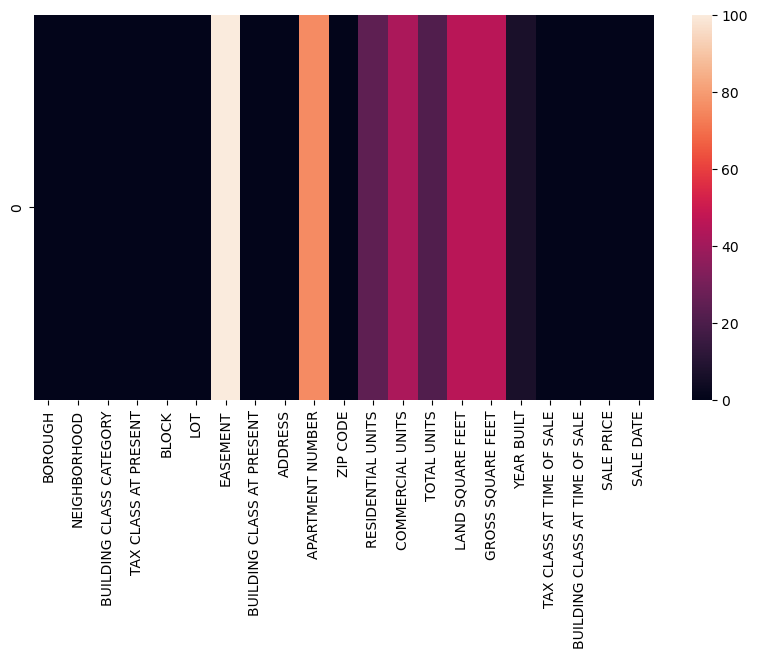

In [790]:
get_nans_count(data)

Видаляємо стовбці EASEMENT, APARTMENT NUMBER та заповнюємо COMMERCIAL UNITS нулями, оскільки дуже ймовірно що якщо в лоті не було COMMERCIAL UNITS то їх не вносили в списки.
Стовбці LAND SQUARE FEET і GROSS SQUARE FEET є досить важливими для наступного дослідження, тому їх краще залишити, навіть в обрізаному стані.

In [791]:
data = delete_columns(data)

In [792]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,73305.000000,73305.000000,73305.000000,73300.000000,55472.000000,42268.000000,57801.000000,3.993900e+04,3.993900e+04,68430.000000,73305.000000,7.330500e+04,73305
mean,2.961490,4172.508205,389.437146,10848.080246,3.565024,0.413149,3.723500,7.504976e+03,6.812155e+03,1952.779906,1.657977,1.243891e+06,2023-04-27 00:28:41.988950528
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,220.000000,1.000000,0.000000e+00,2022-11-01 00:00:00
25%,2.000000,1263.000000,22.000000,10304.000000,1.000000,0.000000,1.000000,2.000000e+03,1.381500e+03,1925.000000,1.000000,0.000000e+00,2023-01-30 00:00:00
50%,3.000000,3238.000000,51.000000,11209.000000,1.000000,0.000000,1.000000,2.500000e+03,1.988000e+03,1950.000000,2.000000,5.100000e+05,2023-04-28 00:00:00
75%,4.000000,6201.000000,1003.000000,11356.000000,2.000000,0.000000,2.000000,4.000000e+03,2.848000e+03,1975.000000,2.000000,9.990000e+05,2023-07-25 00:00:00
max,5.000000,16350.000000,9079.000000,11697.000000,1019.000000,1178.000000,1178.000000,9.166500e+06,2.400000e+06,2023.000000,4.000000,5.981558e+08,2023-10-31 00:00:00
std,1.298879,3548.291483,659.348616,566.823256,24.601775,8.322000,25.200924,1.395299e+05,4.865590e+04,36.479919,0.795865,6.348467e+06,NaN


Заповнюємо відсутні дані COMMERCIAL UNITS нулями, оскільки йсовірно, що багато будівель продавалося без комерційних юнітів, тому можливо через це не внесли дані.

In [793]:
data["COMMERCIAL UNITS"] = data["COMMERCIAL UNITS"].fillna(0)

Перевіряємо кількість нанів після обробки

                                   0
BOROUGH                          0.0
NEIGHBORHOOD                     0.0
BUILDING CLASS CATEGORY          0.0
TAX CLASS AT PRESENT             0.1
BLOCK                            0.0
LOT                              0.0
BUILDING CLASS AT PRESENT        0.1
ADDRESS                          0.0
ZIP CODE                         0.0
RESIDENTIAL UNITS               24.3
COMMERCIAL UNITS                 0.0
TOTAL UNITS                     21.1
LAND SQUARE FEET                45.5
GROSS SQUARE FEET               45.5
YEAR BUILT                       6.7
TAX CLASS AT TIME OF SALE        0.0
BUILDING CLASS AT TIME OF SALE   0.0
SALE PRICE                       0.0
SALE DATE                        0.0


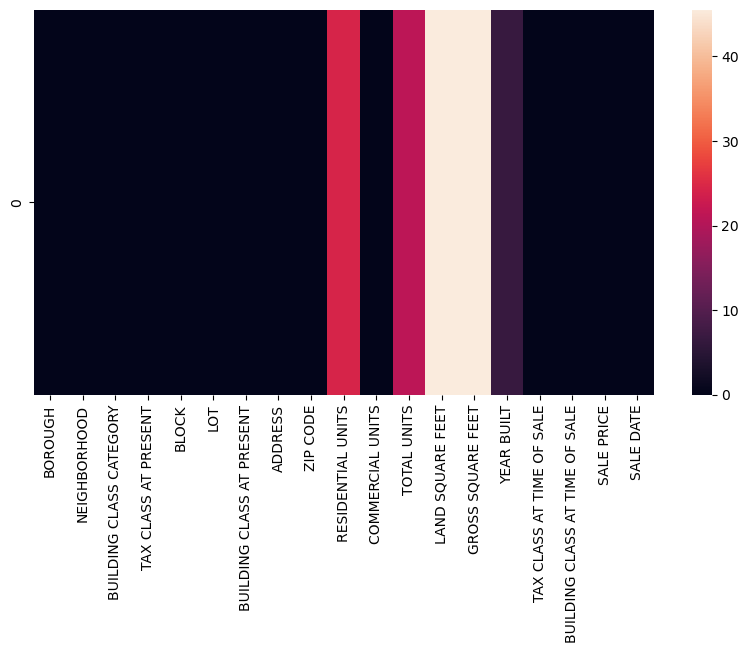

In [794]:
get_nans_count(data)

У нас залишилося 73305 записів. 5 записів відсутні у полі "ZIP CODE", багато відсутньо у полях "RESIDENTIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET",	"GROSS SQUARE FEET",	"YEAR BUILT"

In [795]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,73305.000000,73305.000000,73305.000000,73300.000000,55472.000000,73305.000000,57801.000000,3.993900e+04,3.993900e+04,68430.000000,73305.000000,7.330500e+04,73305
mean,2.961490,4172.508205,389.437146,10848.080246,3.565024,0.238224,3.723500,7.504976e+03,6.812155e+03,1952.779906,1.657977,1.243891e+06,2023-04-27 00:28:41.988950528
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,220.000000,1.000000,0.000000e+00,2022-11-01 00:00:00
25%,2.000000,1263.000000,22.000000,10304.000000,1.000000,0.000000,1.000000,2.000000e+03,1.381500e+03,1925.000000,1.000000,0.000000e+00,2023-01-30 00:00:00
50%,3.000000,3238.000000,51.000000,11209.000000,1.000000,0.000000,1.000000,2.500000e+03,1.988000e+03,1950.000000,2.000000,5.100000e+05,2023-04-28 00:00:00
75%,4.000000,6201.000000,1003.000000,11356.000000,2.000000,0.000000,2.000000,4.000000e+03,2.848000e+03,1975.000000,2.000000,9.990000e+05,2023-07-25 00:00:00
max,5.000000,16350.000000,9079.000000,11697.000000,1019.000000,1178.000000,1178.000000,9.166500e+06,2.400000e+06,2023.000000,4.000000,5.981558e+08,2023-10-31 00:00:00
std,1.298879,3548.291483,659.348616,566.823256,24.601775,6.322533,25.200924,1.395299e+05,4.865590e+04,36.479919,0.795865,6.348467e+06,NaN


В таблиці також є дані про покупки нерухомостя за ціну менше, ніж 100 доларів. Я не впевнений, які ціни на нерухомість мають бути у Нью-йорку, але це точно не менше 1000 доларів за будівлю, і точно не по 8, 100. Але якщо ці дані також видалити, то кількість даних упаде в рази, що не може позитивно сказатися на аналізі. Думаю для коректного аналізу необхідно брати дані з більш достовірних джерел

In [796]:

data1 = data.drop(data[data["SALE PRICE"] < 100 ].index)

In [797]:
data1.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,18873.000000,18873.000000,18873.000000,18872.000000,12943.000000,18873.000000,13700.000000,8620.000000,8.620000e+03,17661.000000,18873.000000,1.887300e+04,18873
mean,2.980607,4318.838658,423.775764,10935.763989,5.173994,0.161871,5.111095,4299.227726,8.991359e+03,1954.567918,1.752133,1.753843e+06,2023-05-01 15:10:38.054363392
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1800.000000,1.000000,1.000000e+02,2022-11-01 00:00:00
25%,2.000000,1238.000000,21.000000,10308.000000,1.000000,0.000000,1.000000,2000.000000,1.326000e+03,1925.000000,1.000000,5.000000e+05,2023-02-01 00:00:00
50%,3.000000,3082.000000,51.000000,11219.000000,1.000000,0.000000,1.000000,2500.000000,1.866000e+03,1950.000000,2.000000,8.000000e+05,2023-05-08 00:00:00
75%,4.000000,6721.000000,1016.000000,11367.000000,2.000000,0.000000,2.000000,4000.000000,2.730000e+03,1978.000000,2.000000,1.395000e+06,2023-07-28 00:00:00
max,5.000000,16350.000000,9039.000000,11697.000000,484.000000,390.000000,484.000000,738000.000000,1.161129e+06,2023.000000,4.000000,4.100000e+08,2023-10-31 00:00:00
std,1.229256,3774.436585,683.421444,557.983702,35.280789,3.209451,34.570941,11761.378935,5.074184e+04,36.464482,0.787664,6.960892e+06,NaN


Було 73305 записів, залишилося 18723. Мені здається що краще спробувати використати альтернативні метрики, для яких не потрібна ціна покупки, ніж зменшувати в рази кількість даних, з якими я працюю. Такою метрикою може бути кількість покупок будівель, в порівнянні з середньою ціною покупки в місяць для відомих значень

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,73305.000000,73305.000000,73305.000000,73300.000000,55472.000000,73305.000000,57801.000000,3.993900e+04,3.993900e+04,73305.000000,73305.000000,7.330500e+04,73305
mean,2.961490,4172.508205,389.437146,10848.080246,3.565024,0.238224,3.723500,7.504976e+03,6.812155e+03,1837.568539,1.657977,1.243891e+06,2023-04-27 00:28:41.988950528
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,220.000000,1.000000,0.000000e+00,2022-11-01 00:00:00
25%,2.000000,1263.000000,22.000000,10304.000000,1.000000,0.000000,1.000000,2.000000e+03,1.381500e+03,1920.000000,1.000000,0.000000e+00,2023-01-30 00:00:00
50%,3.000000,3238.000000,51.000000,11209.000000,1.000000,0.000000,1.000000,2.500000e+03,1.988000e+03,1941.000000,2.000000,5.100000e+05,2023-04-28 00:00:00
75%,4.000000,6201.000000,1003.000000,11356.000000,2.000000,0.000000,2.000000,4.000000e+03,2.848000e+03,1970.000000,2.000000,9.990000e+05,2023-07-25 00:00:00
max,5.000000,16350.000000,9079.000000,11697.000000,1019.000000,1178.000000,1178.000000,9.166500e+06,2.400000e+06,2023.000000,4.000000,5.981558e+08,2023-10-31 00:00:00
std,1.298879,3548.291483,659.348616,566.823256,24.601775,6.322533,25.200924,1.395299e+05,4.865590e+04,433.136361,0.795865,6.348467e+06,NaN


                                   0
BOROUGH                          0.0
NEIGHBORHOOD                     0.0
BUILDING CLASS CATEGORY          0.0
TAX CLASS AT PRESENT             0.1
BLOCK                            0.0
LOT                              0.0
BUILDING CLASS AT PRESENT        0.1
ADDRESS                          0.0
ZIP CODE                         0.0
RESIDENTIAL UNITS               24.3
COMMERCIAL UNITS                 0.0
TOTAL UNITS                     21.1
LAND SQUARE FEET                45.5
GROSS SQUARE FEET               45.5
YEAR BUILT                       0.0
TAX CLASS AT TIME OF SALE        0.0
BUILDING CLASS AT TIME OF SALE   0.0
SALE PRICE                       0.0
SALE DATE                        0.0


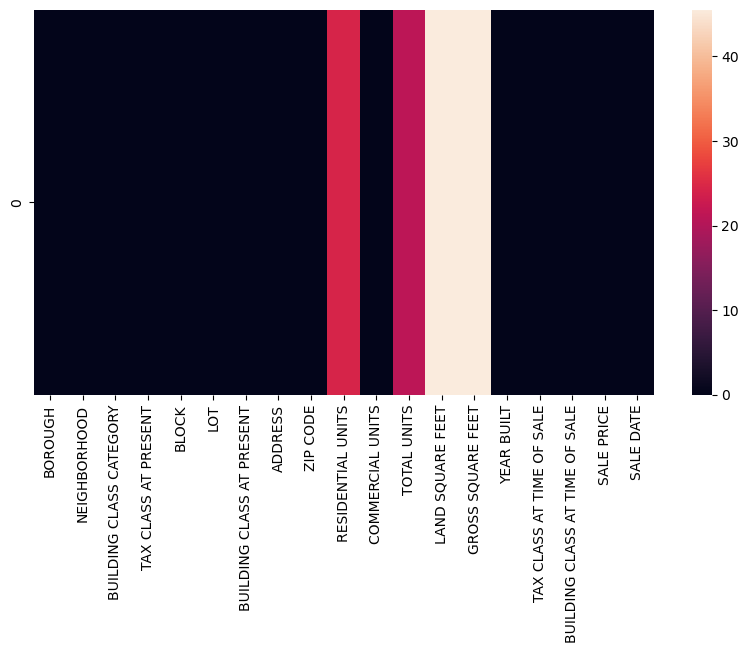

In [804]:
get_nans_count(data)

Заповнюємо роки будівель. Для цього є функція, яка заміняє одне відірване від реальності значення, 220, та відсутні значення, на мінімальне

In [808]:
fill_year_build(data=data)

9167     1800.0
7037     1800.0
9164     1800.0
9165     1800.0
9166     1800.0
          ...  
20381    2023.0
17909    2023.0
17908    2023.0
6325     2023.0
1614     2023.0
Name: YEAR BUILT, Length: 73305, dtype: float64


In [833]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,MOUNTH
count,73305.000000,73305.000000,73305.000000,73300.000000,55472.000000,73305.000000,57801.000000,3.993900e+04,3.993900e+04,73305.000000,73305.000000,7.330500e+04,73305,73305.000000
mean,2.961490,4172.508205,389.437146,10848.080246,3.565024,0.238224,3.723500,7.504976e+03,6.812155e+03,1945.141647,1.657977,1.243891e+06,2023-04-27 00:28:41.988950528,6.535680
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,1.000000,0.000000e+00,2022-11-01 00:00:00,1.000000
25%,2.000000,1263.000000,22.000000,10304.000000,1.000000,0.000000,1.000000,2.000000e+03,1.381500e+03,1920.000000,1.000000,0.000000e+00,2023-01-30 00:00:00,4.000000
50%,3.000000,3238.000000,51.000000,11209.000000,1.000000,0.000000,1.000000,2.500000e+03,1.988000e+03,1941.000000,2.000000,5.100000e+05,2023-04-28 00:00:00,6.000000
75%,4.000000,6201.000000,1003.000000,11356.000000,2.000000,0.000000,2.000000,4.000000e+03,2.848000e+03,1970.000000,2.000000,9.990000e+05,2023-07-25 00:00:00,9.000000
max,5.000000,16350.000000,9079.000000,11697.000000,1019.000000,1178.000000,1178.000000,9.166500e+06,2.400000e+06,2023.000000,4.000000,5.981558e+08,2023-10-31 00:00:00,12.000000
std,1.298879,3548.291483,659.348616,566.823256,24.601775,6.322533,25.200924,1.395299e+05,4.865590e+04,45.008091,0.795865,6.348467e+06,NaN,3.412333


Створимо колонку Місяць, яка вказуватиме на те, якого місяця відбувся продаж нерухомості

In [851]:
data["MOUNTH"] = pd.DatetimeIndex(data["SALE DATE"]).month_name()

In [852]:
data["MOUNTH"]

0       November
1          April
2         August
3          April
4           June
          ...   
6830    December
6831    December
6832    December
6833    December
6834    December
Name: MOUNTH, Length: 73305, dtype: object

Розділимо дані по районах.

In [886]:
manhattan = data.where(data["BOROUGH"] == 1)
bronx = data.where(data["BOROUGH"] == 2)
brooklyn = data.where(data["BOROUGH"] == 3)
queens = data.where(data["BOROUGH"] == 4)
statenisland = data.where(data["BOROUGH"] == 5)


In [878]:

months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']


In [907]:
def get_price_analys(data):
  print(data["SALE PRICE"].where(data["SALE PRICE"] > 10).dropna().describe())
  
  # price_per_feet = pd.DataFrame()
  
  # price_per_feet["SALE PRICE"] = data["SALE PRICE"]
  # price_per_feet["GROSS SQUARE FEET"] = data["GROSS SQUARE FEET"]
  
  # price_per_feet["SALE PRICE"].replace(0, np.nan)
  # price_per_feet["GROSS SQUARE FEET"].replace(0, np.nan)
  
  # price_per_feet = price_per_feet.dropna()
  
  # print("Meat price per feet")
  # print(price_per_feet["GROSS SQUARE FEET"].min())
  
  # print(data["SALE PRICE"].replace(0, np.nan).dropna())

In [881]:
def print_month_buy_count(data):
  plt.figure(figsize=(10,5))
  data["MOUNTH"].value_counts().reindex(months).plot(kind='bar')

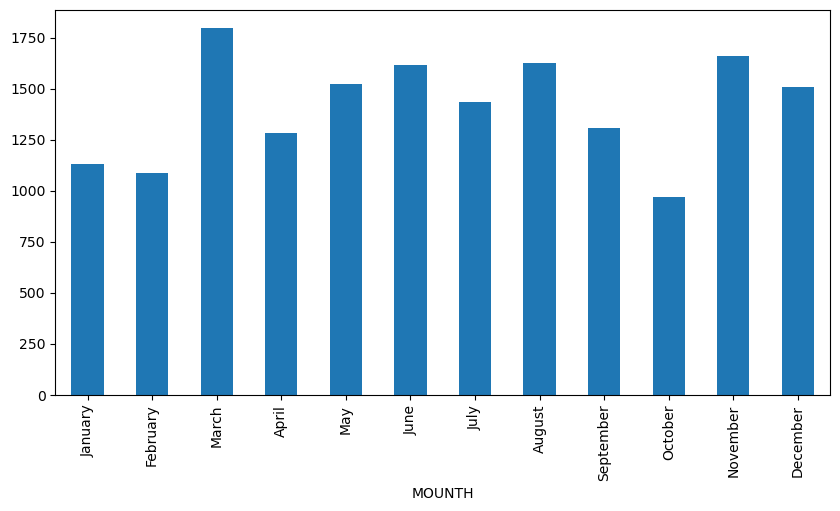

In [882]:
print_month_buy_count(manhattan)


In [908]:
get_price_analys(manhattan)


count    1.338700e+04
mean     3.345557e+06
std      1.319413e+07
min      1.000000e+02
25%      6.805000e+05
50%      1.260000e+06
75%      2.699016e+06
max      5.981558e+08
Name: SALE PRICE, dtype: float64


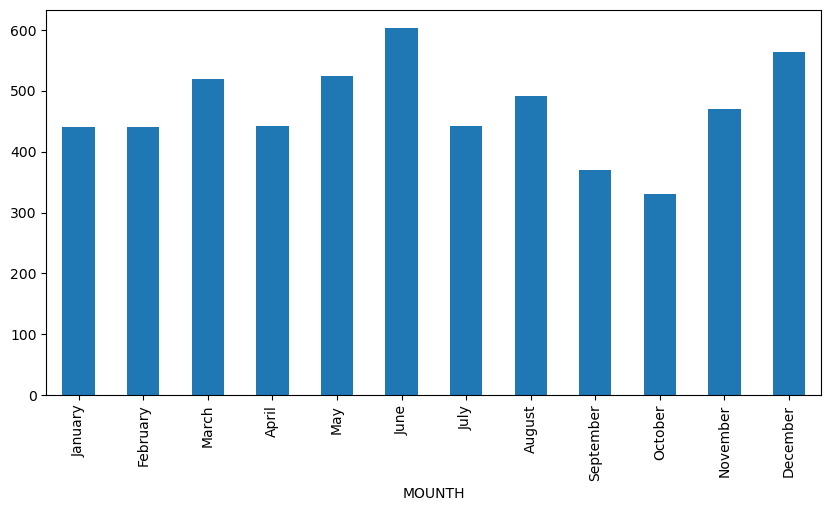

In [909]:
print_month_buy_count(bronx)

In [910]:

get_price_analys(bronx)

count    3.782000e+03
mean     1.295248e+06
std      4.897172e+06
min      2.500000e+01
25%      2.900000e+05
50%      6.000000e+05
75%      8.500000e+05
max      1.037419e+08
Name: SALE PRICE, dtype: float64


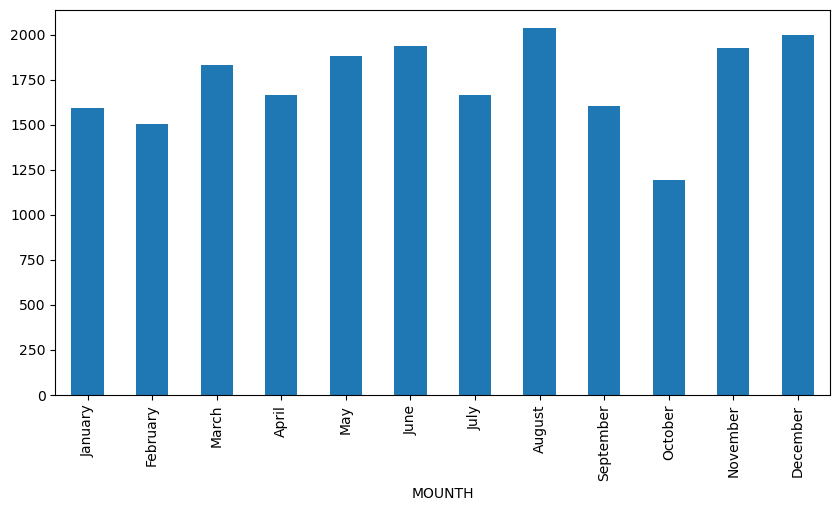

In [911]:
print_month_buy_count(brooklyn)

In [912]:
get_price_analys(brooklyn)

count    1.291400e+04
mean     1.743595e+06
std      4.690348e+06
min      2.000000e+01
25%      6.000000e+05
50%      9.600000e+05
75%      1.620000e+06
max      1.600000e+08
Name: SALE PRICE, dtype: float64


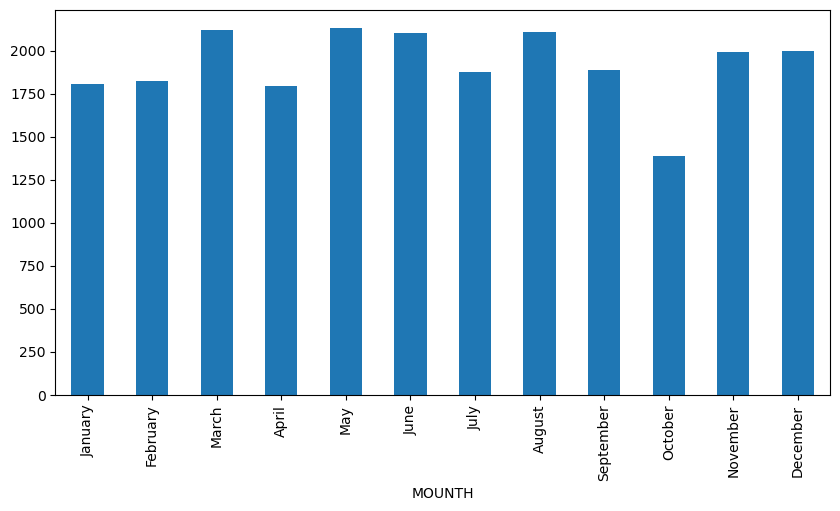

In [913]:
print_month_buy_count(queens)

In [914]:
get_price_analys(queens)

count    1.462500e+04
mean     1.069567e+06
std      3.120444e+06
min      1.500000e+01
25%      3.900000e+05
50%      6.890000e+05
75%      9.900000e+05
max      1.240000e+08
Name: SALE PRICE, dtype: float64


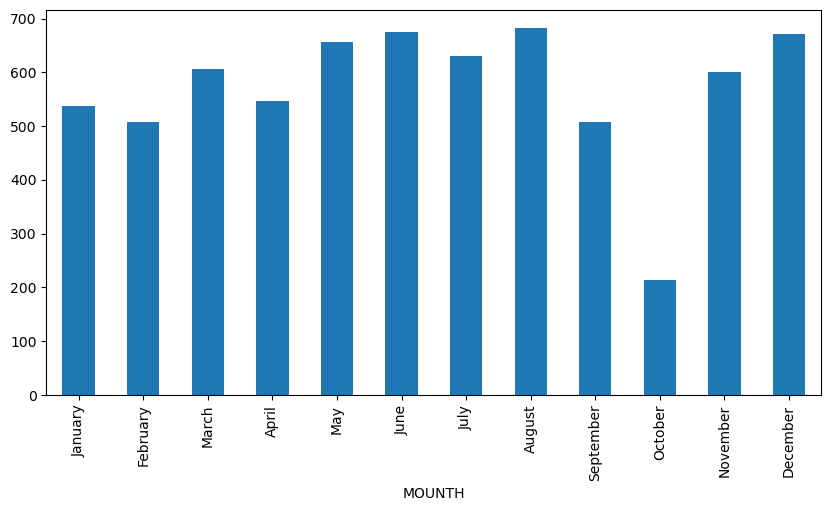

In [916]:
print_month_buy_count(statenisland)

In [915]:
get_price_analys(statenisland)


count    4.311000e+03
mean     7.744459e+05
std      1.138027e+06
min      1.000000e+02
25%      4.750000e+05
50%      6.350000e+05
75%      8.200000e+05
max      4.200000e+07
Name: SALE PRICE, dtype: float64
